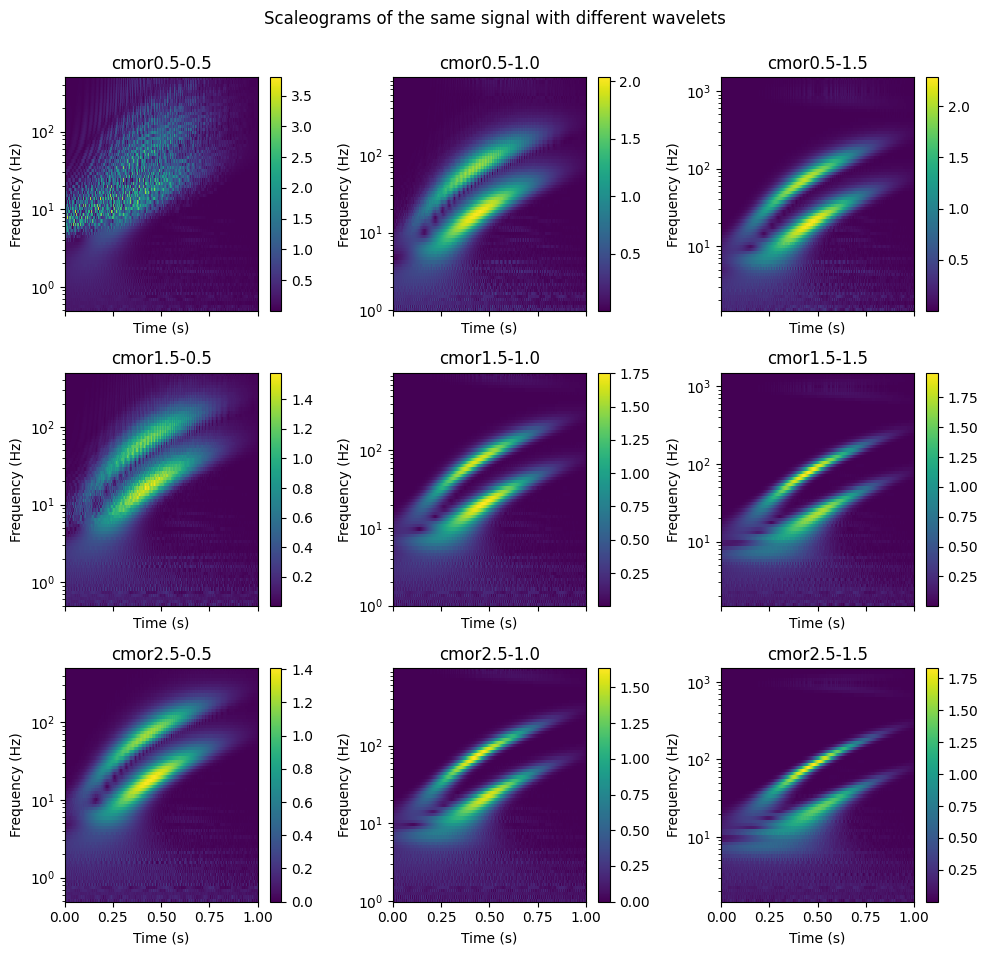

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

def gaussian(x, x0, sigma):
    return np.exp(-np.power((x - x0) / sigma, 2.0) / 2.0)


def make_chirp(t, t0, a):
    frequency = (a * (t + t0)) ** 2
    chirp = np.sin(2 * np.pi * frequency * t)
    return chirp, frequency


def plot_wavelet(time, data, wavelet, title, ax):
    widths = np.geomspace(1, 1024, num=75)
    cwtmatr, freqs = pywt.cwt(
        data, widths, wavelet, sampling_period=np.diff(time).mean()
    )
    cwtmatr = np.abs(cwtmatr[:-1, :-1])
    pcm = ax.pcolormesh(time, freqs, cwtmatr)
    ax.set_yscale("log")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(title)
    plt.colorbar(pcm, ax=ax)
    return ax


# generate signal
time = np.linspace(0, 1, 1000)
chirp1, frequency1 = make_chirp(time, 0.2, 9)
chirp2, frequency2 = make_chirp(time, 0.1, 5)
chirp = chirp1 + 0.6 * chirp2
chirp *= gaussian(time, 0.5, 0.2)

# perform CWT with different wavelets on same signal and plot results
wavelets = [f"cmor{x:.1f}-{y:.1f}" for x in [0.5, 1.5, 2.5] for y in [0.5, 1.0, 1.5]]
fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=True)
for ax, wavelet in zip(axs.flatten(), wavelets):
    plot_wavelet(time, chirp, wavelet, wavelet, ax)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Scaleograms of the same signal with different wavelets")
plt.show()

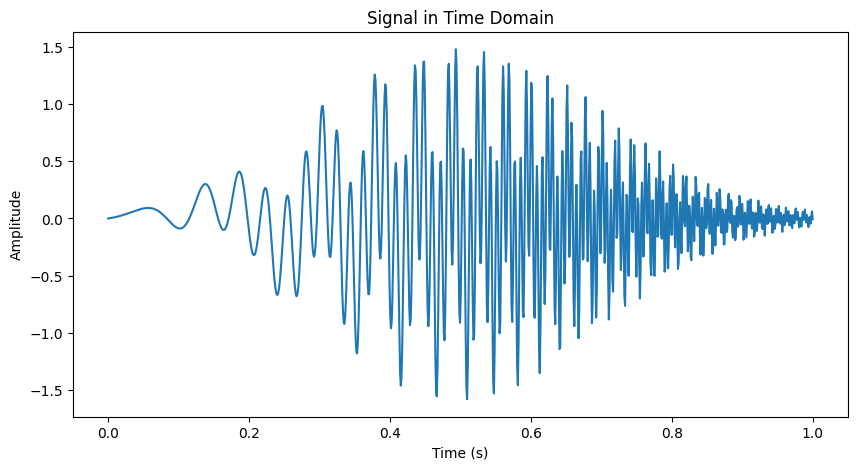

In [ ]:
# Plot the Time representation of the signal
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time, chirp)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.set_title("Signal in Time Domain")
plt.show() 

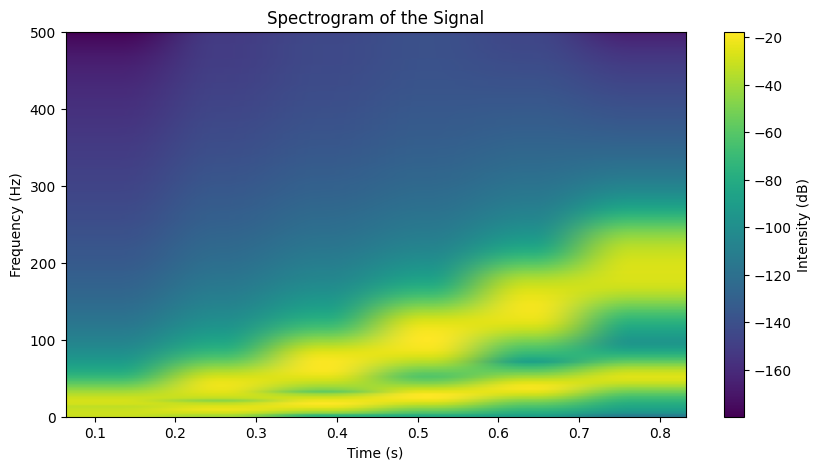

In [3]:
# plot the Spectrogram of the signal
fig, ax = plt.subplots(figsize=(10, 5))
Pxx, freqs, bins, im = ax.specgram(chirp, NFFT=256, Fs=1000, noverlap=128, cmap="viridis")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Spectrogram of the Signal")
plt.colorbar(im, ax=ax).set_label("Intensity (dB)")
plt.show()

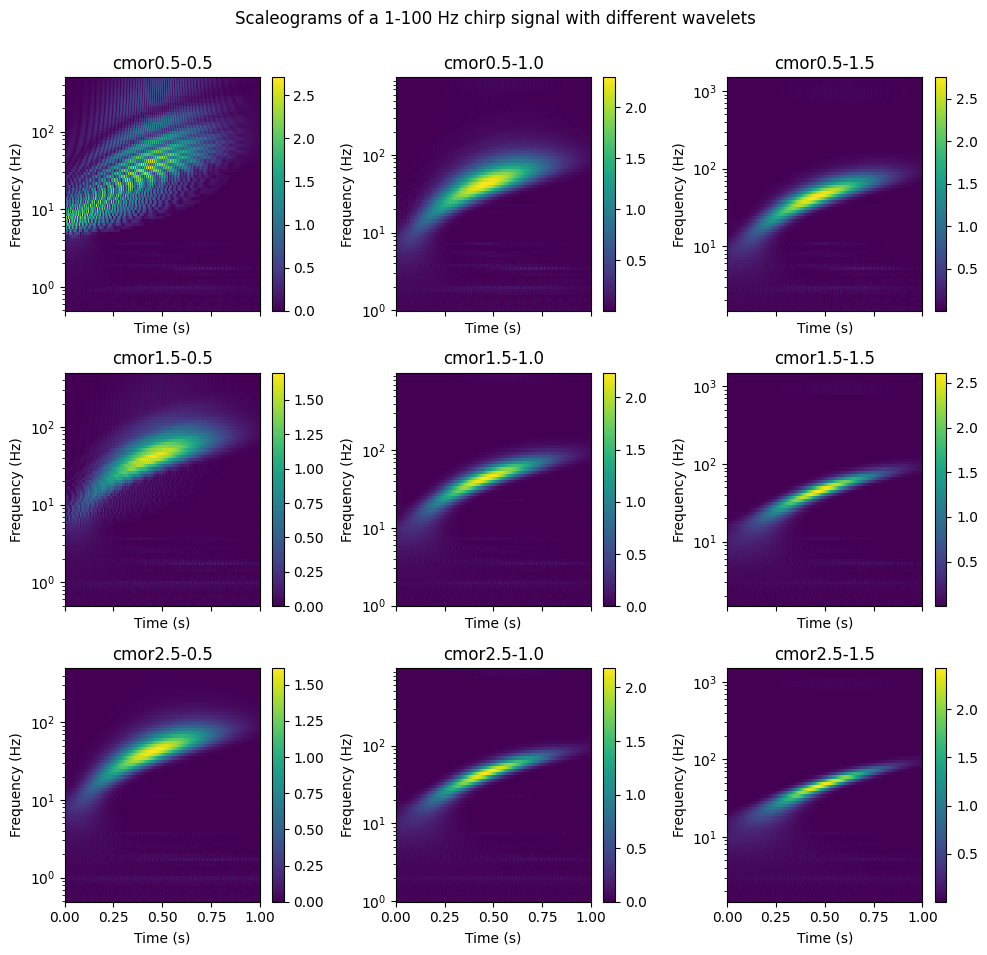

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.signal import chirp

def gaussian(x, x0, sigma):
    return np.exp(-np.power((x - x0) / sigma, 2.0) / 2.0)

def plot_wavelet(time, data, wavelet, title, ax):
    widths = np.geomspace(1, 1024, num=75)
    cwtmatr, freqs = pywt.cwt(
        data, widths, wavelet, sampling_period=np.diff(time).mean()
    )
    cwtmatr = np.abs(cwtmatr[:-1, :-1])
    pcm = ax.pcolormesh(time, freqs, cwtmatr)
    ax.set_yscale("log")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Frequency (Hz)")
    ax.set_title(title)
    plt.colorbar(pcm, ax=ax)
    return ax

# generate a 1-100 Hz chirp signal
time = np.linspace(0, 1, 1000)
# Use scipy.signal.chirp to create a linear sweep from 1 Hz to 100 Hz over 1 second
chirp_signal = chirp(t=time, f0=1, f1=100, t1=1.0, method='linear')
# Apply a Gaussian window to the chirp, as in your original code
chirp_signal *= gaussian(time, 0.5, 0.2)


# perform CWT with different wavelets on the new chirp signal
wavelets = [f"cmor{x:.1f}-{y:.1f}" for x in [0.5, 1.5, 2.5] for y in [0.5, 1.0, 1.5]]
fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=True)
for ax, wavelet in zip(axs.flatten(), wavelets):
    plot_wavelet(time, chirp_signal, wavelet, wavelet, ax)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Scaleograms of a 1-100 Hz chirp signal with different wavelets")
plt.show()

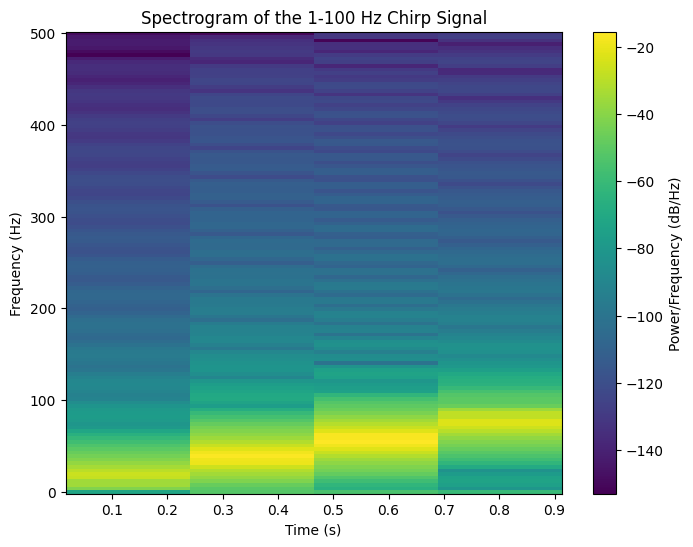

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, spectrogram

def gaussian(x, x0, sigma):
    return np.exp(-np.power((x - x0) / sigma, 2.0) / 2.0)

# generate a 1-100 Hz chirp signal
time = np.linspace(0, 1, 1000)
# Calculate sampling frequency from the time array
fs = 1.0 / np.diff(time).mean()
# Create a linear chirp from 1 Hz to 100 Hz
chirp_signal = chirp(t=time, f0=1, f1=100, t1=1.0, method='linear')
# Apply a Gaussian window
chirp_signal *= gaussian(time, 0.5, 0.2)

# --- Plot the Spectrogram ---
# `nperseg` controls the window length, affecting time-frequency resolution
f, t, Sxx = spectrogram(chirp_signal, fs=fs, nperseg=256)

fig, ax = plt.subplots(figsize=(8, 6))
pcm = ax.pcolormesh(t, f, 10 * np.log10(Sxx))
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Spectrogram of the 1-100 Hz Chirp Signal")
plt.colorbar(pcm, ax=ax, label='Power/Frequency (dB/Hz)')
plt.show()